In [1]:
from MRF import *
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/GDP_h1.csv", index_col = [0])

In [4]:
oos_pos = np.arange(164,213)

In [5]:
MRF = MacroRandomForest(data=data_in,
                        y_pos=0,
                        x_pos=np.arange(1,4), 
                        B= 2, 
                        resampling_opt=2,
                        oos_pos=oos_pos,
                        trend_push=4,
                        quantile_rate=0.3, 
                        print_b = True,
                        fast_rw=True,
                        parallelise=True)

In [6]:
mrf_output = MRF._ensemble_loop()

/Users/ryanlucas/Desktop/MacroRandomForest/Python/MRF.py:317: RuntimeWarning: invalid value encountered in true_divide
  self.avg_beta_nonOVF = self.avg_beta_nonOVF / \
/Users/ryanlucas/Desktop/MacroRandomForest/Python/MRF.py:322: RuntimeWarning: invalid value encountered in true_divide
  self.betas_shu_nonOVF[kk, :, :] = self.betas_shu_nonOVF[kk, :, :] / np.transpose(np.tile(how_many_in, reps=(


<AxesSubplot:>

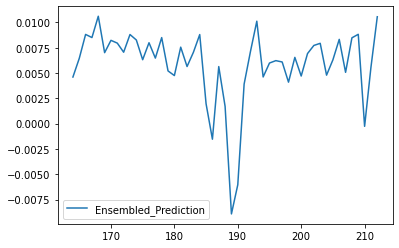

In [7]:
mrf_output['pred_ensemble'].plot()

In [8]:
y = np.array(mrf_output['YandX'].iloc[oos_pos, 0])

In [9]:
y

array([ 0.00443586,  0.00154703,  0.00553234,  0.00856581,  0.01683951,
        0.01141626,  0.00532328,  0.00759187,  0.00940888,  0.00996691,
        0.01100881,  0.00460499,  0.00887385,  0.00629478,  0.01321516,
        0.00233427,  0.00154513,  0.00848257,  0.00235216,  0.00571238,
        0.00541801,  0.00606002, -0.00576358,  0.00515058, -0.00542826,
       -0.02187565, -0.01129045, -0.00144093,  0.0036345 ,  0.01092396,
        0.00384041,  0.00917804,  0.00734507,  0.00500647, -0.00240731,
        0.0071243 , -0.00027782,  0.01152617,  0.00779943,  0.00429279,
        0.00134857,  0.00113809,  0.00881776,  0.0012332 ,  0.00780362,
        0.0079508 , -0.00252081,  0.01246077,  0.01201662])

In [10]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [11]:
my_preds

,Ensembled_Prediction
164,0.004603
165,0.006445
166,0.008814
167,0.008504
168,0.010609
169,0.007012
170,0.008228
171,0.007954
172,0.007056
173,0.008803


Text(0.5, 0.98, 'Betas from Python and R implementation of the GDP_h1 dataset (first 100 columns). Python (light) and R (dark) colors.')

[6.0, 4.0]

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

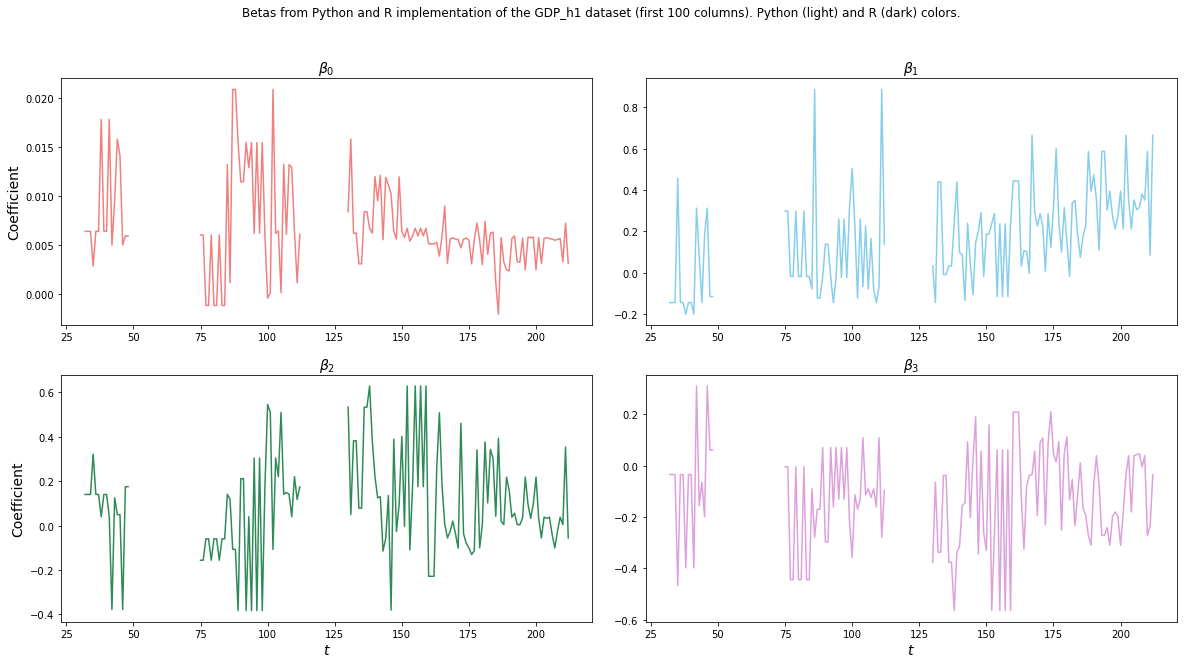

In [12]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("Betas from Python and R implementation of the GDP_h1 dataset (first 100 columns). Python (light) and R (dark) colors.")

plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = (18,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

fig.set_size_inches(20, 10)

ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])

ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [13]:
mrf_output.keys()

dict_keys(['YandX', 'pred_ensemble', 'pred', 'S_names', 'betas', 'betas_draws_raw', 'betas_draws', 'model'])

Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, 'OOS predictions of MRF')

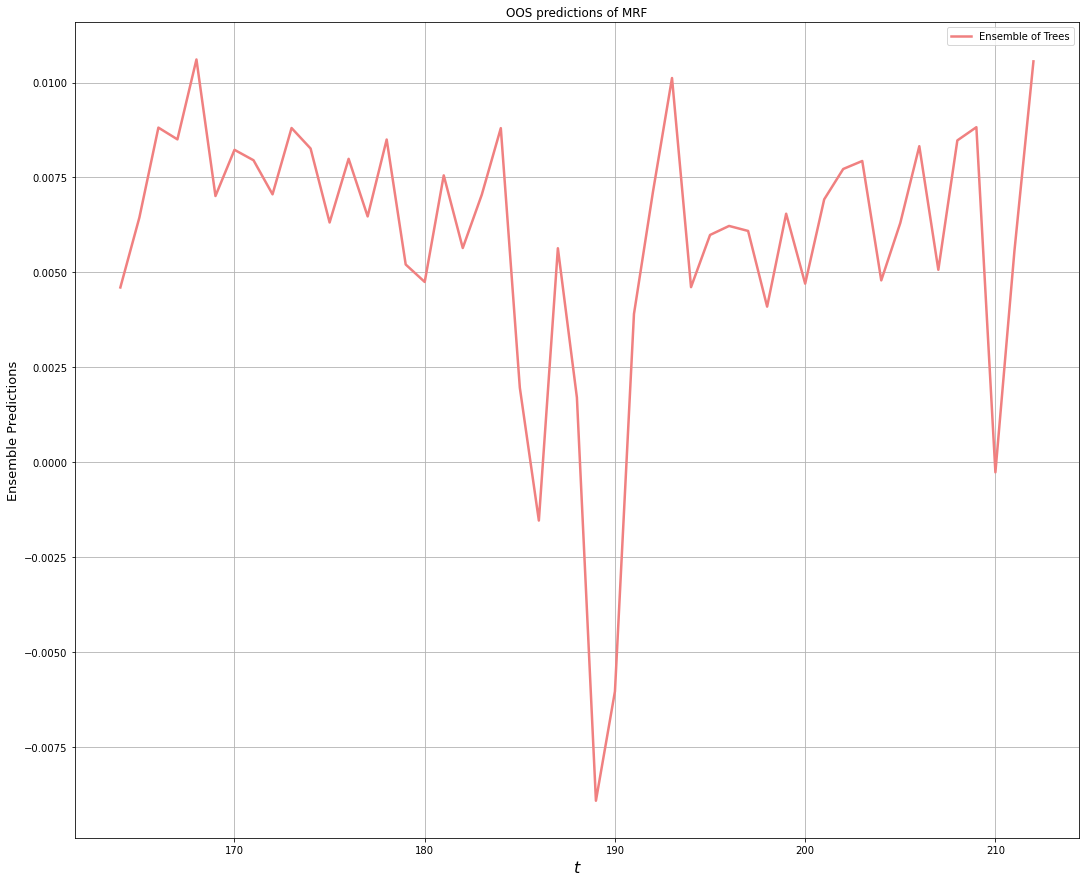

In [14]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(my_preds, color = 'lightcoral', linewidth = 2.5, label = "Ensemble of Trees")
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("OOS predictions of MRF")